In [9]:
#COVID-19 DETECTION USING CHEST X-RAY IMAGES

In [10]:
#STEP-1 IMPORTING LIBRARIES

In [11]:
from keras.models import Sequential #for iniatializing 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import imutils
import cv2
from matplotlib import pyplot as plt

In [12]:
#Data Preparation & Preprocessing

In [13]:
def crop_xray_contour(image, plot=False):    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')    
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    return new_image

In [16]:
#Step2: Initializing the model

In [19]:
model = Sequential()

In [20]:
#Step3: Adding Convolution and maxpoolig Layers and Flattening image

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
model.add(Conv2D(70, (3, 3), activation='relu', input_shape=(70, 70, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 70)        20230     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 70)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          40384     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [26]:
#Step4 :Ann Layers

In [27]:
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [29]:

model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [30]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 70)        20230     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 70)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          40384     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
x_train = train_datagen.flow_from_directory(r'E:\GITAM\SEM_7\Mini_Project\RADAR_DS\COVID_19\TRAIN',target_size=(64,64),batch_size=32,class_mode='binary')
x_test = train_datagen.flow_from_directory(r'E:\GITAM\SEM_7\Mini_Project\RADAR_DS\COVID_19\TEST',target_size=(64,64),batch_size=32,class_mode='binary')

Found 1248 images belonging to 2 classes.
Found 312 images belonging to 2 classes.


In [34]:
print(x_train.class_indices)

{'COVID-19': 0, 'NORMAL': 1}


In [35]:
history=model.fit(x_train,epochs = 100,validation_data=x_test)

Epoch 1/100
39/39 [==============================] - 62s 2s/step - loss: 0.4727 - accuracy: 0.8598 - val_loss: 0.4185 - val_accuracy: 0.8590
Epoch 2/100
39/39 [==============================] - 35s 909ms/step - loss: 0.3874 - accuracy: 0.8598 - val_loss: 0.3946 - val_accuracy: 0.8590
Epoch 3/100
39/39 [==============================] - 35s 907ms/step - loss: 0.3800 - accuracy: 0.8598 - val_loss: 0.3527 - val_accuracy: 0.8590
Epoch 4/100
39/39 [==============================] - 35s 908ms/step - loss: 0.2651 - accuracy: 0.8998 - val_loss: 0.1845 - val_accuracy: 0.9359
Epoch 5/100
39/39 [==============================] - 35s 902ms/step - loss: 0.1882 - accuracy: 0.9423 - val_loss: 0.2177 - val_accuracy: 0.9199
Epoch 6/100
39/39 [==============================] - 35s 896ms/step - loss: 0.1503 - accuracy: 0.9511 - val_loss: 0.1246 - val_accuracy: 0.9583
Epoch 7/100
39/39 [==============================] - 35s 907ms/step - loss: 0.1230 - accuracy: 0.9591 - val_loss: 0.0926 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


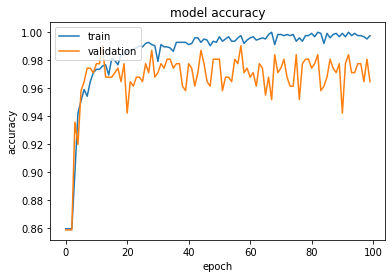

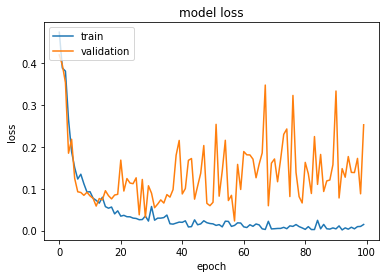

In [41]:

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
model.save('covid_detect_gi.h5')

In [46]:
model=load_model('covid_detect_gi.h5')

In [2]:
#prediction

In [3]:
from keras.models import load_model
import numpy as np

In [4]:
import cv2

In [5]:
model=load_model('covid_detect_gi.h5')

In [6]:
from skimage.transform import resize

In [8]:
def detect(frame):
    try:
        img= resize(frame,(64,64))
        #print(img)
        img= np.expand_dims(img,axis=0)
        #print(img)
        if(np.max(img)>1):
            img= img/255.0
        prediction= model.predict(img)
        print(prediction)
        print(model.predict_classes(img))
    except AttributeError:
        print("Not found")

In [10]:
frame= cv2.imread(r'E:\GITAM\SEM_7\Mini_Project\RADAR_DS\COVID_19\TEST\1 no.jpg')
data= detect(frame)

Not found
